In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


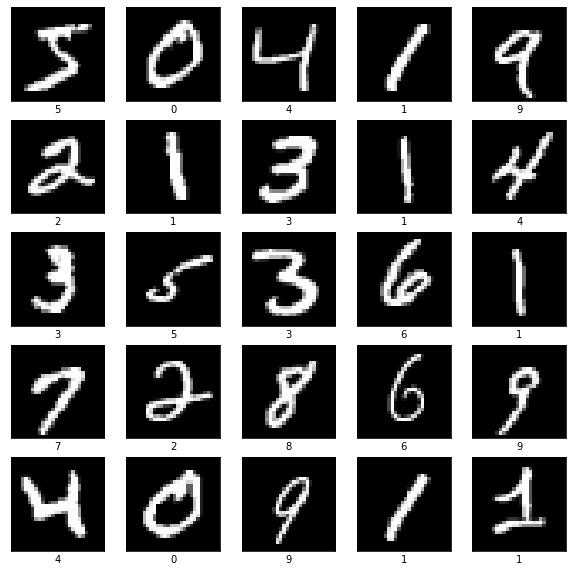

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(kernel_size=5, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Flatten())

# 512 개 노드 가지는 Dense
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 출력층
model.add(Dense(10, activation='softmax'))

In [14]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [16]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2900 - accuracy: 0.9086 - val_loss: 0.0584 - val_accuracy: 0.9810
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9651 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 3/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0878 - accuracy: 0.9740 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0276 - val_accuracy: 0.9912
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0699 - accuracy: 0.9791 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0219 - val_accuracy: 0.9925
Epoch 7/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0635 - accuracy: 0.9810 - val_loss: 0.0229 - val_accuracy:

In [17]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.9957


[0.01830989122390747, 0.9957000017166138]

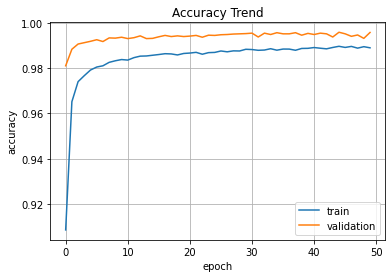

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

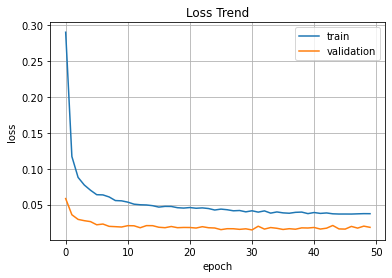

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()